### 1. dataframe에서 값을 조회(iloc-숫자, loc-문자)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
                  index=["a", "b", "c"],
                  columns=["A", "B", "C", "D"])
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [5]:
df.loc['a','B']

11

In [8]:
df.loc['b':,'B':'C']

,B,C
b,15,16
c,19,20


In [35]:
df.loc[df.A>10 ,:]

,A,B,C,D
b,14,15,16,17
c,18,19,20,21


In [38]:
df.loc['d'] = [90,91,92,93]

In [39]:
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21
d,90,91,92,93


In [9]:
df[:1]

,A,B,C,D
a,10,11,12,13


In [66]:
print(df['B'])

print(df.B)

a    11
b    15
c    19
d    91
Name: B, dtype: int64
a    11
b    15
c    19
d    91
Name: B, dtype: int64


In [67]:
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21
d,90,91,92,93


In [73]:
print(df[:1])

print(df.iloc[:1])

    A   B   C   D
a  10  11  12  13
    A   B   C   D
a  10  11  12  13


In [88]:
df.loc['b':'b']

,A,B,C,D
b,14,15,16,17


In [97]:
df.iloc[1:2]

,A,B,C,D
b,14,15,16,17


In [106]:
# select on multiple conditions

print(df[(df.A>15)&(df.B>15)])

print(df[(df.A>10) | (df.B>15)])

    A   B   C   D
c  18  19  20  21
d  90  91  92  93
    A   B   C   D
b  14  15  16  17
c  18  19  20  21
d  90  91  92  93


In [115]:
# 같은 결과물

print(df.loc['a','A'])

print(df.iloc[0,0])

10
10


### 2. lambda

In [116]:
def plus(x,y):
    return x+y

In [117]:
plus(3,4)

7

In [119]:
(lambda x,y : x+y)(3,4)

7

In [122]:
list(map(lambda x: x ** 2, range(5)))

[0, 1, 4, 9, 16]

In [126]:
from functools import reduce
print(reduce(lambda x,y : x+y, range(5)))

print(reduce(lambda x,y : y+x, 'abcde'))

10
edcba


In [131]:
print(list(filter(lambda x: x<5, range(10))))

print(list(filter(lambda x: x % 3, range(10))))

[0, 1, 2, 3, 4]
[1, 2, 4, 5, 7, 8]


### 3. violinplot vs boxplot

In [132]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(1)

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

In [133]:
# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('Violin plot')

Text(0.5,1,'Violin plot')

In [134]:
# plot box plot
axes[1].boxplot(all_data)

axes[1].set_title('Box plot')

Text(0.5,1,'Box plot')

In [135]:
# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')

In [136]:
# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

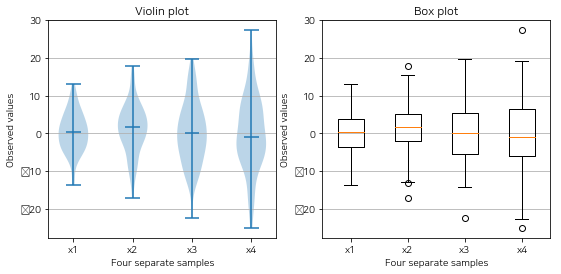

In [137]:
# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

So obviously, the violin plot can show more information than box plot. When we perform an exploratory analysis, nothing about the samples could be known. So the distribution of the samples can not be assumed to a normal distribution and usually when you get a big data, the normal distribution will show some out liars in box plot. Referring to the paper by Hintze, J. L. and R. D. Nelson (1998), the violin plot combines the box plot and the density trace, so it seems that the box plot may give the place to the violin plot and I said this in the seminar from a viewpoint of environmental science. But after the seminar, I really doubt that no environmental scientists use this plot. Of course, the violin plot is young comparing with the box plot introduced by Tukey(1977), but there also exist some reasons which stop the spread of violin plot. Here I list it as follows:

the violin plot can’t show a better curve with small samples. In Hintze’s paper, he thought a smooth curve with at least 30 observations. But the box plot may stand for a smaller observations. Also the bandwidth need to be chosed carefully.

the modification box plot could show the number of observations in the groups using the var width while the violin plot couldn’t. When we make some comparison between different groups, the violin plot will hide this information.

Another problem is the notch in the box plot to compare the median. In the violin plot, we get a better understanding of distribution of violin plot but less with comparisone with ‘strong evidence’(Chambers et al., 1983, p. 62).

Those were nitpick reasons but I think if someone just want to show the violin plot instead of box plot, he need to know the details. Nowadays, it is easy to use new concepts to confusing the readers, we need more thoughts about the nature. Here is a example: there are numbers people who thought the box plot show the mean…

In [138]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [149]:
ax = sns.violinplot(x=tips["total_bill"])

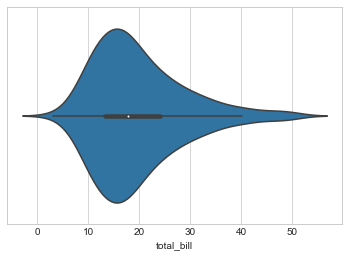

In [150]:
plt.show()

In [151]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

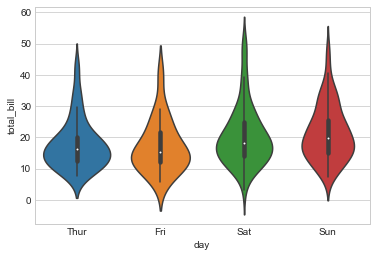

In [152]:
plt.show()

In [153]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                  data=tips, palette="muted", split=True)

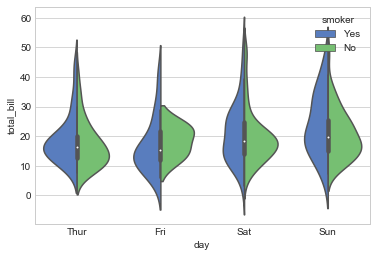

In [154]:
plt.show()

### 4. enumerate